In [36]:
import tourney
import scoring
import history
import pandas
import re
import matplotlib.pyplot as plt
import matplotlib.figure as Figure
import base64
from io import BytesIO
from IPython.display import display, HTML

In [37]:
games = open("data/games.txt", "r").read()
t = tourney.Tourney()
t.parse_games(games)
df = tourney.get_scores_per_game_dataframe(t, scoring.WinBonusScorer)
df

,Brian,Dan,Dave,Gene,Jack,Jim,JimS,Matt,Natalie,Rae,Sam,Seth,Steve,Victoria,Game Summaries
0,0.000000,NaN,0.2,0.0,NaN,NaN,0.200000,0.2,NaN,NaN,0.0,0.000000,0.200000,NaN,"Dave, JimS, Matt, Steve over Brian, Gene, Sam,..."
1,0.000000,NaN,0.4,0.0,NaN,NaN,0.400000,0.4,NaN,NaN,0.0,0.000000,0.400000,NaN,"Dave, JimS, Matt, Steve over Brian, Gene, Sam,..."
2,0.000000,0.2,0.6,0.2,0.2,0.2,0.600000,0.6,0.2,0.2,0.2,0.200000,0.400000,0.2,"Dan, Dave, Gene, Jack, Jim, JimS, Matt, Natali..."
3,48.200000,0.2,0.6,0.2,0.2,0.2,0.600000,0.6,0.2,0.2,0.2,52.400000,56.600000,0.2,"Brian, Seth, Steve over Dan, Dave, Gene, Jack,..."
4,60.400000,0.2,0.6,0.2,0.2,0.2,0.600000,0.6,0.2,0.2,0.2,48.400000,52.600000,0.2,Brian over Steve
5,72.400000,0.2,0.6,0.2,0.4,0.4,0.800000,0.6,0.2,0.2,0.2,60.400000,64.600000,0.2,"Jack, Jim, JimS over Natalie, Rae, Sam"
6,81.066667,0.2,0.6,0.2,0.4,0.4,0.833333,0.8,0.2,0.4,0.2,69.066667,73.266667,0.2,"JimS, Matt, Rae over Jack, Jim, Natalie"


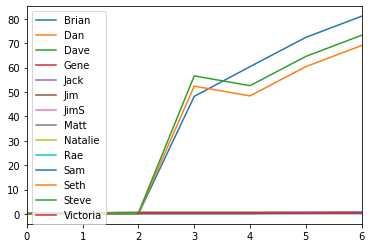

In [38]:
df.plot()


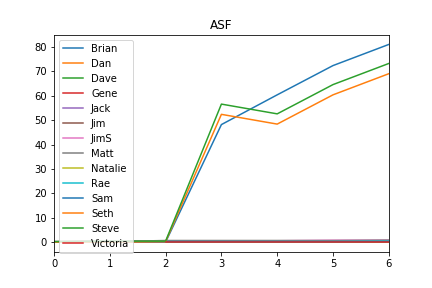

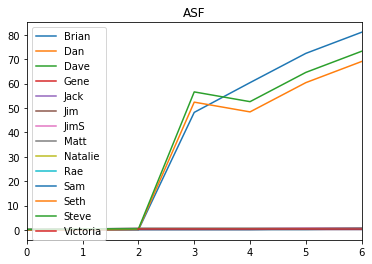

In [51]:

fig = plt.figure()
ax = fig.subplots()
df.plot(title="ASF", ax=ax)
#ax.plot([1, 2])
#ax.plot(df)
# Save it to a temporary buffer.
buf = BytesIO()
fig.savefig(buf, format="png")
#buf.seek(0)
# Embed the result in the html output.
data = base64.b64encode(buf.getbuffer()).decode("ascii")
#data = base64.b64encode(buf.getvalue()).decode("utf-8")
#data = base64.b64encode(buf.read())
display(HTML(f'<img src="data:image/png;base64,{data}"/>'))

In [52]:
t.get_games()


[{'winners': ['Dave', 'JimS', 'Matt', 'Steve'],
  'losers': ['Brian', 'Gene', 'Sam', 'Seth']},
 {'winners': ['Dave', 'JimS', 'Matt', 'Steve'],
  'losers': ['Brian', 'Gene', 'Sam', 'Seth']},
 {'winners': ['Dan',
   'Dave',
   'Gene',
   'Jack',
   'Jim',
   'JimS',
   'Matt',
   'Natalie',
   'Rae',
   'Sam',
   'Seth',
   'Victoria'],
  'losers': ['Brian', 'Steve']},
 {'winners': ['Brian', 'Seth', 'Steve'],
  'losers': ['Dan',
   'Dave',
   'Gene',
   'Jack',
   'Jim',
   'JimS',
   'Matt',
   'Natalie',
   'Rae',
   'Sam',
   'Victoria']},
 {'winners': ['Brian'], 'losers': ['Steve']},
 {'winners': ['Jack', 'Jim', 'JimS'], 'losers': ['Natalie', 'Rae', 'Sam']},
 {'winners': ['JimS', 'Matt', 'Rae'], 'losers': ['Jack', 'Jim', 'Natalie']}]